In [214]:
import csv
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as stats
import scipy.stats as ss
from matplotlib import style
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 4)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# from sklearn.decomposition import RandomizedPCA, PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import StandardScaler
import seaborn

with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25


this is a **test** cell. you can add a [link](https://docs.python.org/3/tutorial/classes.html#a-first-look-at-classes) there. sometimes, you would like to use a *italics* format. i am not sure what `inline really` means.
>Also, you can blockquote somethiend.ffffffffffffffffffff aaaaaaaaaaaaaaaa aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa dkdfjdfjd

[**bootstrap**](https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/)

bootstrap is a sampling techincal: `random sampling with replacement`. so in one bootstrap sample, the one sample may appear 0, 1, or more times. 

example: draw 3 samples from [0,1,2,3,4,5], bootstrapping works as follow:
* drop one sample first, for example, 2, then place 2 back. 
* draw second sample, for example 5, place 5 back
* draw thrid dample, for example 2.

so the sample drawn is [2,5,2]

# scikit learn data preprocessing


In [3]:
wkdir = '/projects/trans_scratch/validations/workspace/szong/python_study/2D_hierarchical_clustering/'
X_train = pd.read_csv(f'{wkdir}X_train.csv')
Y_train = pd.read_csv(f'{wkdir}Y_train.csv')
X_test = pd.read_csv(f'{wkdir}X_test.csv')
Y_test = pd.read_csv(f'{wkdir}Y_test.csv')
X_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001032,Male,No,0,Graduate,No,4950,0.0,125,360,1,Urban
1,LP001824,Male,Yes,1,Graduate,No,2882,1843.0,123,480,1,Semiurban


In [9]:
num_features = X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")].index.values

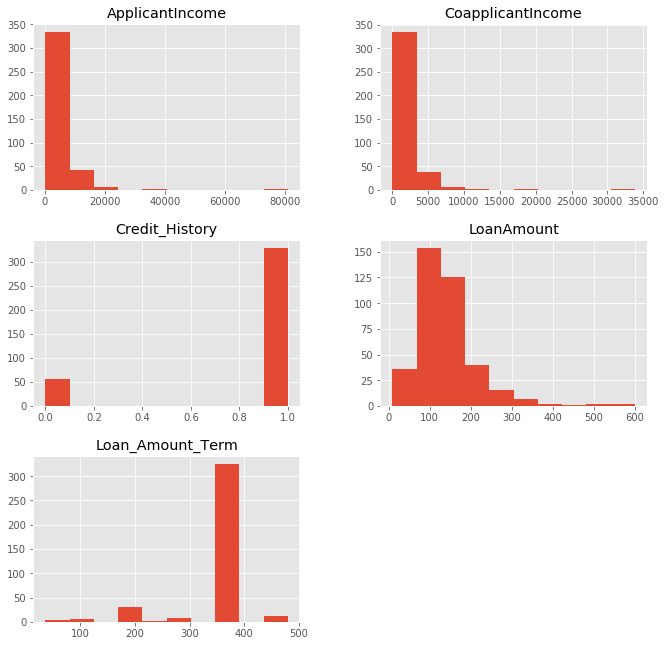

In [11]:
_ = X_train[num_features].hist(figsize=[11,11])

If we try to apply distance based methods such as kNN on these features, feature with the largest range will dominate the outcome results and we’ll obtain less accurate predictions.We can overcome this trouble using feature scaling.

In [14]:
# Initializing and Fitting a k-NN model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train[num_features],Y_train)
# Checking the performance of our model on the testing data set
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,knn.predict(X_test[num_features]))

/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.6145833333333334

In [7]:
Y_train.Target.value_counts()/Y_train.Target.count()

Y    0.705729
N    0.294271
Name: Target, dtype: float64

In [24]:
# Importing MinMaxScaler and initializing it
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[num_features])
X_test_minmax=min_max.fit_transform(X_test[num_features])

In [25]:
# Fitting k-NN on our scaled data set
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)
# Checking the model's accuracy
accuracy_score(Y_test,knn.predict(X_test_minmax))

/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.75

It should be kept in mind while performing distance based methods we must attempt to scale the data, so that the feature with lesser significance might not end up dominating the objective function due to its larger range. In addition, features having different unit should also be scaled thus providing each feature equal initial weightage and at the end we will have a better prediction model.

In [21]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in X_test.columns.values:
   # Encoding only categorical variables
   if X_test[col].dtypes=='object':
       # Using whole data to form an exhaustive list of levels
       data=X_train[col].append(X_test[col])
       le.fit(data.values)
       X_train[col]=le.transform(X_train[col])
       X_test[col]=le.transform(X_test[col])

In [34]:
X_train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,13,1,0,0,0,0,4950,0.0,125,360,1,2
1,193,1,1,1,0,0,2882,1843.0,123,480,1,1


In [33]:
# to show scaling
X_train[num_features].head(2)
X_train_minmax[:2]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4950,0.0,125,360,1
1,2882,1843.0,123,480,1


array([[0.0593692 , 0.        , 0.1962775 , 0.72972973, 1.        ],
       [0.03379097, 0.054467  , 0.1928934 , 1.        , 1.        ]])

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scale = StandardScaler()
# Standardizing the features
X_train_scale=scale.fit_transform(X_train)
X_test_scale=scale.fit_transform(X_test)

# Fitting the logistic regression model
log=LogisticRegression(penalty='l2',C=.01)
log.fit(X_train_scale,Y_train)
# Checking the models accuracy
accuracy_score(Y_test,log.predict(X_test_scale))

/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.75

In [38]:
# both continuous and categorical variables are scaled?
X_train.head(2)
X_train_scale[:2]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,13,1,0,0,0,0,4950,0.0,125,360,1,2
1,193,1,1,1,0,0,2882,1843.0,123,480,1,1


array([[-1.63381726,  0.45557345, -1.36589591, -0.74383384, -0.49674264,
        -0.40451992, -0.03769694, -0.59984568, -0.21938895,  0.27229341,
         0.40886826,  1.23149106],
       [-0.35153349,  0.45557345,  0.73212021,  0.25488013, -0.49674264,
        -0.40451992, -0.42803219,  0.10337366, -0.2460278 ,  2.09708696,
         0.40886826, -0.03972552]])

In [5]:
a = [1,2,3,4,5]
b = [10, 25, 27, 33, 43]
from scipy.stats import linregress
linregress(a, b)

LinregressResult(slope=7.4000000000000004, intercept=5.3999999999999986, rvalue=0.9689981816260097, pvalue=0.0065220580513283841, stderr=1.0893423092245438)

In [40]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd

X = np.array([[1,2,100],[4,3,50],[1,1,75]])

print(X)

[[  1   2 100]
 [  4   3  50]
 [  1   1  75]]


In [41]:
print(euclidean_distances(X))

[[ 0.         50.0999002  25.01999201]
 [50.0999002   0.         25.25866188]
 [25.01999201 25.25866188  0.        ]]


In [42]:
X

array([[  1,   2, 100],
       [  4,   3,  50],
       [  1,   1,  75]])

In [43]:
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X))

In [44]:
X_scaled

,0,1,2
0,-0.707107,0.000000,1.224745
1,1.414214,1.224745,-1.224745
2,-0.707107,-1.224745,0.000000


In [47]:
X_scaled.std()
X_scaled.sum()

0    1.224745
1    1.224745
2    1.224745
dtype: float64

0    0.0
1    0.0
2    0.0
dtype: float64

In [48]:
X_scaled.sum()

0    0.0
1    0.0
2    0.0
dtype: float64

In [49]:
print(StandardScaler().fit_transform(X))

[[-0.70710678  0.          1.22474487]
 [ 1.41421356  1.22474487 -1.22474487]
 [-0.70710678 -1.22474487  0.        ]]


In [21]:
X.T

array([[  1,   4,   1],
       [  2,   3,   1],
       [100,  50,  75]])

In [20]:
print(StandardScaler().fit_transform(X.T))

[[-0.71784716 -0.68417824 -0.70710678]
 [-0.69631175 -0.72979012 -0.70710678]
 [ 1.41415891  1.41396836  1.41421356]]


/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
Y = StandardScaler().fit_transform(X)

/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
a=0
for y in Y:
    a+=y.mean()
print(a)
print(Y.std())

0.0
0.9999999999999999


In [4]:
print(euclidean_distances(StandardScaler().fit_transform(X)))


[[0.         3.46410162 1.73205081]
 [3.46410162 0.         3.46410162]
 [1.73205081 3.46410162 0.        ]]


/projects/da_workspace/software/miniconda/envs/dlpy3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
X = np.array([[1,2,100],[1,1,75]])
print(X)
print(euclidean_distances(X))

[[  1   2 100]
 [  1   1  75]]
[[ 0.         25.01999201]
 [25.01999201  0.        ]]


In [ ]:
X = np.array([[1,2,100],[1,1,75]])
print(euclidean_distances(X))

In [ ]:
X = np.array([[1,2,100],[8,3,50]])

data can be download from here: https://www.kaggle.com/dansbecker/starting-your-ml-project/data

In [84]:
f = '/projects/trans_scratch/validations/workspace/szong/development/sklearn/melb-data.zip'
melbourne_data = pd.read_csv(f)
melbourne_data.head(2)

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [85]:
melbourne_data.shape
melbourne_data = melbourne_data.dropna(axis=0)
melbourne_data.shape

(18396, 22)

(6196, 22)

In [86]:
y = melbourne_data.Price

In [87]:
melbourne_predictors = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']

In [88]:
X = melbourne_data[melbourne_predictors]

In [89]:
# Define model
melbourne_model = DecisionTreeRegressor()

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [91]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude
1      2       1.0     156.0          79.0     1900.0   -37.8079    144.9934
2      3       2.0     134.0         150.0     1900.0   -37.8093    144.9944
4      4       1.0     120.0         142.0     2014.0   -37.8072    144.9941
6      3       2.0     245.0         210.0     1910.0   -37.8024    144.9993
7      2       1.0     256.0         107.0     1890.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [93]:
predicted_home_prices = melbourne_model.predict(X)
predicted_home_prices.shape
mean_absolute_error(y, predicted_home_prices)

(6196,)

434.71594577146544

you can not use the prediction for the tranining data to calculate prediction accuracy because the model has seen the data already. so one way is to split the data into traning set and validation set

In [94]:
# split data into training and validation data, for both predictors and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

264422.3841187863


In [97]:
val_y.mean()
# roughly 20% error

1091516.642995481

In [98]:
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [99]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  258171
Max leaf nodes: 500  		 Mean Absolute Error:  243495
Max leaf nodes: 5000  		 Mean Absolute Error:  254983


### random forest: 10 estimators

In [101]:
forest_model = RandomForestRegressor(n_estimators=50)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

192952.58193242952


In [105]:
# Load data
f = '/projects/trans_scratch/validations/workspace/szong/development/sklearn/melb-data.zip'
melb_data = pd.read_csv(f)

melb_target = melb_data.Price
melb_predictors = melb_data.drop(['Price'], axis=1)

# For the sake of keeping the example simple, we'll use only numeric predictors. 
melb_numeric_predictors = melb_predictors.select_dtypes(exclude=['object'])
melb_numeric_predictors.columns

Index(['Unnamed: 0', 'Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount'],
      dtype='object')

In [107]:
X_train, X_test, y_train, y_test = train_test_split(melb_numeric_predictors, 
                                                    melb_target,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [108]:
def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

In [110]:
X_train.isnull().any()

Unnamed: 0       False
Rooms            False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
Lattitude         True
Longtitude        True
Propertycount     True
dtype: bool

In [111]:
cols_with_missing = [col for col in X_train.columns 
                                 if X_train[col].isnull().any()]

In [112]:
cols_with_missing

['Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [113]:
X_train.columns

Index(['Unnamed: 0', 'Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount'],
      dtype='object')

this is equivalent to only using number of rooms as predictor

In [114]:
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test  = X_test.drop(cols_with_missing, axis=1)
print("Mean Absolute Error from dropping columns with Missing Values:")
print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

Mean Absolute Error from dropping columns with Missing Values:


/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


350800.46865374164


In [116]:
reduced_X_train.head(2)

,Unnamed: 0,Rooms
5043,6603,3
1402,1772,3


what does Imputer do? this impute the missing values so that we could include those columns. Or we could fill in with median or other values as appropriate, sklearn.preprocessing.Imputer's default is mean

In [118]:
my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)
print("Mean Absolute Error from Imputation:")
print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Absolute Error from Imputation:
205293.26233013227


In [74]:
### Get Score from Imputation with Extra Columns Showing What Was Imputed

In [119]:
imputed_X_train_plus = X_train.copy()
imputed_X_test_plus = X_test.copy()

In [141]:
cols_with_missing = (col for col in X_train.columns 
                                 if X_train[col].isnull().any())

In [139]:
# generator becomes empty after iterated, so don't run this line before you add was_ missing columns to data
# for col in cols_with_missing:
#     print(col)

In [142]:
imputed_X_train_plus.head(2)

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
5043,6603,3,8.7,3032.0,3.0,2.0,2.0,210.0,NaN,NaN,-37.7732,144.8790,4918.0
1402,1772,3,11.2,3186.0,3.0,0.0,0.0,0.0,NaN,NaN,-37.9301,144.9935,10579.0


In [143]:
for col in cols_with_missing:
    print(col + '_was_missing')
    imputed_X_train_plus[col + '_was_missing'] = imputed_X_train_plus[col].isnull()
    imputed_X_test_plus[col + '_was_missing'] = imputed_X_test_plus[col].isnull()

Distance_was_missing
Postcode_was_missing
Bedroom2_was_missing
Bathroom_was_missing
Car_was_missing
Landsize_was_missing
BuildingArea_was_missing
YearBuilt_was_missing
Lattitude_was_missing
Longtitude_was_missing
Propertycount_was_missing


In [144]:
imputed_X_train_plus.columns

Index(['Unnamed: 0', 'Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount', 'Distance_was_missing',
       'Postcode_was_missing', 'Bedroom2_was_missing', 'Bathroom_was_missing',
       'Car_was_missing', 'Landsize_was_missing', 'BuildingArea_was_missing',
       'YearBuilt_was_missing', 'Lattitude_was_missing',
       'Longtitude_was_missing', 'Propertycount_was_missing'],
      dtype='object')

In [146]:
imputed_X_train_plus[imputed_X_train_plus.Landsize_was_missing==True].head(2)

,Unnamed: 0,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Postcode_was_missing,Bedroom2_was_missing,Bathroom_was_missing,Car_was_missing,Landsize_was_missing,BuildingArea_was_missing,YearBuilt_was_missing,Lattitude_was_missing,Longtitude_was_missing,Propertycount_was_missing
13712,17628,2,12.7,3085.0,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,True,True,True,True,False
10919,14030,3,8.5,3185.0,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,True,True,True,True,False


Use Imputation slightly improves the prediction when comparing to simply discarding the training examples with missing value

In [215]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test_plus = my_imputer.transform(imputed_X_test_plus)

print("Mean Absolute Error from Imputation while Track What Was Imputed:")
print(score_dataset(imputed_X_train_plus, imputed_X_test_plus, y_train, y_test))

Mean Absolute Error from Imputation while Track What Was Imputed:


/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


201704.69686537416


In [221]:
imputed_X_train_plus[0,:]

array([ 6.60300000e+03,  3.00000000e+00,  8.70000000e+00,  3.03200000e+03,
        3.00000000e+00,  2.00000000e+00,  2.00000000e+00,  2.10000000e+02,
        1.53541211e+02,  1.96608654e+03, -3.77732000e+01,  1.44879000e+02,
        4.91800000e+03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

### house price dataset

In [222]:
# Read the data
train_data = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/development/sklearn/train.csv')
test_data = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/development/sklearn/test.csv')

# Drop houses where the target is missing
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

target = train_data.SalePrice

In [223]:
train_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [225]:
target.shape

(1460,)

In [226]:
# Since missing values isn't the focus of this tutorial, we use the simplest
# possible approach, which drops these columns. 
# For more detail (and a better approach) to missing values, see
# https://www.kaggle.com/dansbecker/handling-missing-values
cols_with_missing = [col for col in train_data.columns 
                                 if train_data[col].isnull().any()]         

In [227]:
cols_with_missing

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [228]:
candidate_train_predictors = train_data.drop(['Id', 'SalePrice'] + cols_with_missing, axis=1)
candidate_test_predictors = test_data.drop(['Id'] + cols_with_missing, axis=1)

# "cardinality" means the number of unique values in a column.
# We use it as our only way to select categorical columns here. This is convenient, though
# a little arbitrary.
low_cardinality_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].nunique() < 10 and
                                candidate_train_predictors[cname].dtype == "object"]
numeric_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].dtype in ['int64', 'float64']]
my_cols = low_cardinality_cols + numeric_cols

In [229]:
my_cols[:5]

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities']

In [230]:
train_predictors = candidate_train_predictors[my_cols]
test_predictors = candidate_test_predictors[my_cols]

In [231]:
train_predictors.shape

(1460, 57)

In [232]:
test_predictors.shape

(1459, 57)

In [233]:
train_predictors.dtypes.sample(10)

WoodDeckSF        int64
3SsnPorch         int64
YearRemodAdd      int64
BldgType         object
TotRmsAbvGrd      int64
YearBuilt         int64
ExterCond        object
SaleCondition    object
LowQualFinSF      int64
Heating          object
dtype: object

In [238]:
train_predictors
train_predictors.shape

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,548,0,61,0,0,0,0,0,2,2008
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,...,460,298,0,0,0,0,0,0,5,2007
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,608,0,42,0,0,0,0,0,9,2008
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,642,0,35,272,0,0,0,0,2,2006
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,460,0,40,0,0,0,0,0,8,2007
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,500,349,0,0,0,0,0,0,2,2010
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,252,0,60,0,0,0,0,2500,5,2010
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,240,366,0,112,0,0,0,0,4,2010


(1460, 57)

In [236]:
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)

In [239]:
train_predictors.columns
one_hot_encoded_training_predictors.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual',
       'Functional', 'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=159)

In [240]:
train_predictors.head(2)
one_hot_encoded_training_predictors.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,548,0,61,0,0,0,0,0,2,2008
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,...,460,298,0,0,0,0,0,0,5,2007


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0


In [243]:
def get_mae(X, y):
    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
    return -1 * cross_val_score(RandomForestRegressor(50), 
                                X, y, 
                                scoring = 'neg_mean_absolute_error').mean()

predictors_without_categoricals = train_predictors.select_dtypes(exclude=['object'])

mae_without_categoricals = get_mae(predictors_without_categoricals, target)

mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, target)

print('Mean Absolute Error when Dropping Categoricals: ' + str(int(mae_without_categoricals)))
print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))


/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Mean Absolute Error when Dropping Categoricals: 18252
Mean Abslute Error with One-Hot Encoding: 18193


In [245]:
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)
# make sure the column orders are the same , scikitlearn is sensitive to ordering of columns
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)

In [247]:
one_hot_encoded_training_predictors.align??

In [170]:
train_predictors.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,548,0,61,0,0,0,0,0,2,2008
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,...,460,298,0,0,0,0,0,0,5,2007


In [171]:
test_predictors.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,...,730.0,140,0,0,0,120,0,0,6,2010
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,312.0,393,36,0,0,0,0,12500,6,2010


In [189]:
assert (final_train.columns == final_test.columns).all()

In [183]:
one_hot_encoded_training_predictors.shape

(1460, 159)

In [184]:
one_hot_encoded_test_predictors.shape

(1459, 148)

In [185]:
final_train.shape

(1460, 159)

In [186]:
final_test.shape

(1459, 159)

### XGboost 


In [210]:
data = pd.read_csv('train.csv')
# test_data = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/ml/test.csv')

data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])

In [211]:
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/projects/da_workspace/software/miniconda/envs/ai/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
train_X.shape

(1095, 37)

In [14]:
test_X.shape

(365, 37)

In [15]:
my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [16]:
# make predictions
predictions = my_model.predict(test_X)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 17772.1804795


In [17]:
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [18]:
# make predictions
predictions = my_model.predict(test_X)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 17740.9548801


In [29]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [30]:
# make predictions
predictions = my_model.predict(test_X)

print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 18041.1514127


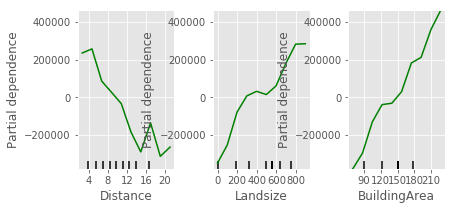

In [56]:
cols_to_use = ['Distance', 'Landsize', 'BuildingArea']

def get_some_data():
    data = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/ml/melb_data.csv')
    y = data.Price
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y
    

X, y = get_some_data()
my_model = GradientBoostingRegressor()
my_model.fit(X, y)
my_plots = plot_partial_dependence(my_model, 
                                   features=[0,1, 2], 
                                   X=X, 
                                   feature_names=cols_to_use, 
                                   grid_resolution=10)

In [64]:
data = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/ml/melb_data.csv')
y = data.Price
X = data[cols_to_use]
my_imputer = Imputer()
imputed_X = my_imputer.fit_transform(X)

In [68]:
np.argwhere(np.isnan(imputed_X)) # no nan values in imputed array

array([], shape=(0, 2), dtype=int64)

pipeline

In [4]:
# Read Data
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/ml/melb_data.csv'
data = pd.read_csv(f)
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]
y = data.Price
train_X, test_X, train_y, test_y = train_test_split(X, y)

In [7]:
train_X.shape

(13797, 5)

In [9]:
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [10]:
my_pipeline.fit(train_X, train_y)
predictions = my_pipeline.predict(test_X)

In [11]:
predictions

array([  934400.        ,  1100650.        ,   895766.66666667, ...,
         536120.45454545,  2067200.        ,   763050.        ])

In [14]:
mean_absolute_error(test_y, predictions)

264416.63593611866

cross validation vs. train_test_split:

    small dataset use cross validation, takes longer to run
    
    large dataset, train_test_split may be sufficient
    
    hold out 20% for validation/test.
    
    5 fold cross validation, hold out each fo the 5 20% of whole data as test data. run 5 times

In [17]:
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error', cv=5)
print(scores)

[-339121.89529482 -315552.05624208 -312007.34573899 -253540.16659438
 -255377.90996372]


In [24]:
print('Mean Absolute Error {0:.2f}' .format(-1 * scores.mean()))

Mean Absolute Error 295119.87


In [25]:
f = '/projects/trans_scratch/validations/workspace/szong/Cervical/ml/AER_credit_card_data.csv'

In [26]:
data = pd.read_csv(f, 
                   true_values = ['yes'],
                   false_values = ['no'])
print(data.head())

   card  reports       age  income     share  expenditure  owner  selfemp  \
0  True        0  37.66667  4.5200  0.033270   124.983300   True    False   
1  True        0  33.25000  2.4200  0.005217     9.854167  False    False   
2  True        0  33.66667  4.5000  0.004156    15.000000   True    False   
3  True        0  30.50000  2.5400  0.065214   137.869200  False    False   
4  True        0  32.16667  9.7867  0.067051   546.503300   True    False   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


In [27]:
data.shape

(1319, 12)

In [29]:
y = data.card
X = data.drop(['card'], axis=1)

# Since there was no preprocessing, we didn't need a pipeline here. Used anyway as best practice
modeling_pipeline = make_pipeline(RandomForestClassifier())
cv_scores = cross_val_score(modeling_pipeline, X, y, scoring='accuracy')
print("Cross-val accuracy: %f" %cv_scores.mean())

Cross-val accuracy: 0.979528


In [30]:
expenditures_cardholders = data.expenditure[data.card]
expenditures_noncardholders = data.expenditure[~data.card]

print('Fraction of those who received a card with no expenditures: %.2f' \
      %(( expenditures_cardholders == 0).mean()))
print('Fraction of those who received a card with no expenditures: %.2f' \
      %((expenditures_noncardholders == 0).mean()))

Fraction of those who received a card with no expenditures: 0.02
Fraction of those who received a card with no expenditures: 1.00


In [31]:
potential_leaks = ['expenditure', 'share', 'active', 'majorcards']
X2 = X.drop(potential_leaks, axis=1)
cv_scores = cross_val_score(modeling_pipeline, X2, y, scoring='accuracy')
print("Cross-val accuracy: %f" %cv_scores.mean())

Cross-val accuracy: 0.806677


In [13]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Automatically created module for IPython interactive environment


In [14]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [15]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

In [16]:
X.shape
y.shape

(150, 2)

(150,)

In [17]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

In [18]:
list(models)

[SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='linear', max_iter=-1, probability=False, random_state=None,
     shrinking=True, tol=0.001, verbose=False),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
           intercept_scaling=1, loss='squared_hinge', max_iter=10000,
           multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
           verbose=0),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False)]

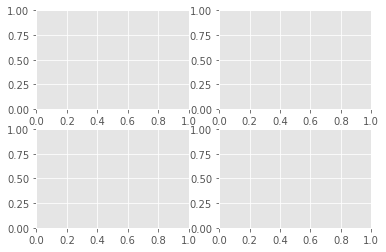

In [19]:
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, axes = plt.subplots(2, 2)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, axes.flatten()):
    print('xxxx', ax)
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [20]:
sub.flatten()

NameError: name 'sub' is not defined

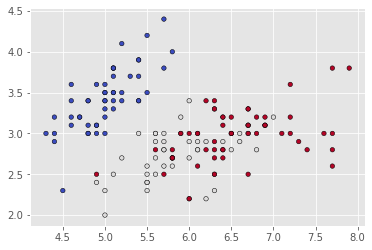

In [21]:
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [22]:
model = svm.SVC(kernel='linear', C=C)
model = model.fit(X, y)

In [23]:
model.predict([[0.4, 0.9]])

array([0])

In [24]:
xx

array([[3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       ...,
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88],
       [3.3 , 3.32, 3.34, ..., 8.84, 8.86, 8.88]])

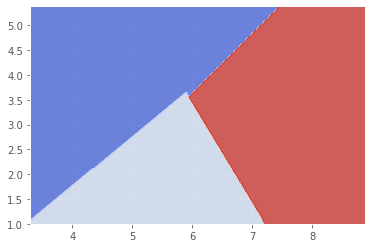

In [27]:
f, ax = plt.subplots()
plot_contours(ax, model, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)

In [109]:
X.shape

(150, 2)

(4.3, 7.9)

(2.0, 4.4)

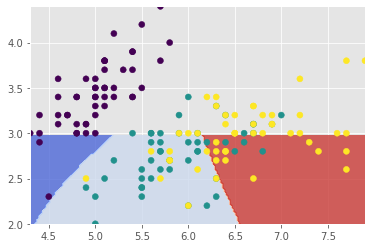

In [28]:
C = 1.0
f, ax = plt.subplots()
xx, yy = np.meshgrid(np.arange(X.min()-1, X.max()+1, 0.02), np.arange(y.min()-1, y.max()+1, 0.02))
# model = svm.SVC(kernel='linear', C=C)
# model = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)
model = svm.SVC(kernel='rbf', gamma=0.7, C=C)
model = model.fit(X, y)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X[:,0], X[:, 1], c=y)
ax.set_xlim(X[:,0].min(), X[:,0].max())
ax.set_ylim(X[:,1].min(), X[:,1].max())
plt.show()


In [105]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [104]:
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

array([[1, 2, 3, 0, 0, 4, 5, 6]])

In [249]:
from sklearn.datasets import fetch_rcv1

In [250]:
rcv1 = fetch_rcv1()

In [ ]:
rcv1.data